In [2]:
import numpy as np # for matrix calculation
import pandas as pd # for data analayzing and transformation
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualisation

from sklearn import linear_model # ML liner models
from sklearn import metrics # ML metrics
from sklearn import preprocessing
from sklearn.model_selection import  train_test_split # for split data

%matplotlib inline
plt.style.use('seaborn')

C:\Users\admin\AppData\Local\Temp\ipykernel_5496\814621340.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
audi_data = pd.read_csv('data/audi.zip')
audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [8]:
print(audi_data.shape)
print()
print(audi_data.info())
print()
print(audi_data.describe())

(10668, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None

               year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [9]:
audi_data.describe(include='object')

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


In [10]:
temp_data = audi_data.copy()

In [11]:
types = temp_data.dtypes
num_features = list(types[types != 'object'].index)
num_features

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

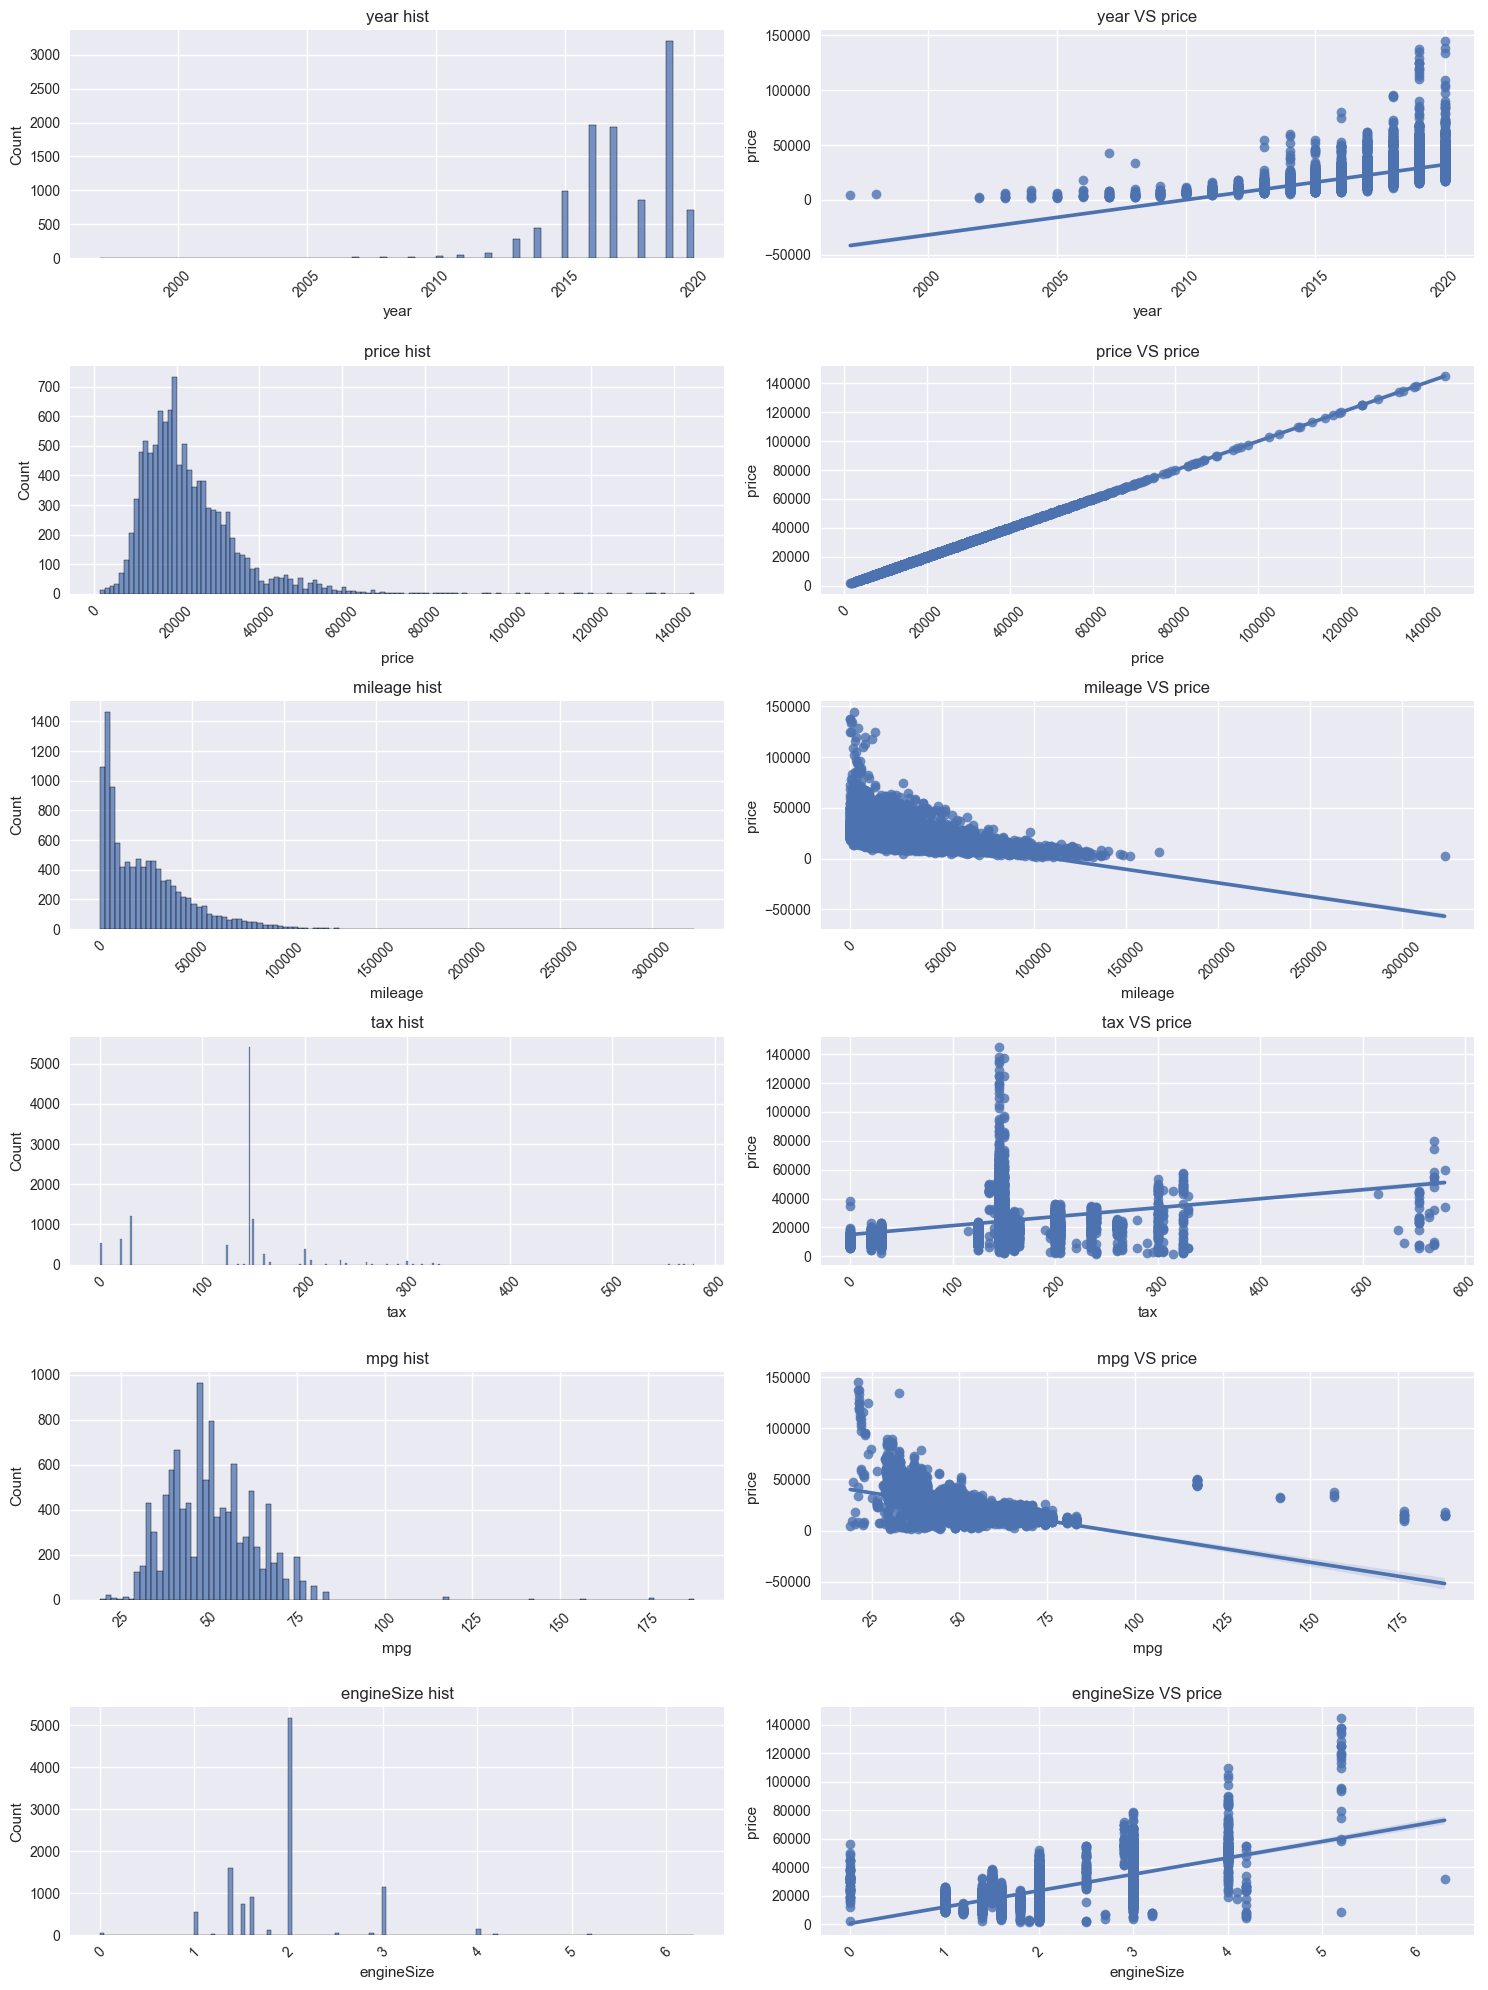

In [13]:
n = len(num_features)
fig, axes = plt.subplots(n, 2, figsize=(15,20))
for i, feature in enumerate(num_features):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title('{} hist'.format(feature))
    histplot.xaxis.set_tick_params(rotation=45)
    regplot = sns.regplot(data=temp_data, x=feature, y='price', ax=axes[i][1])
    regplot.set_title('{} VS price'.format(feature))
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

C:\Users\admin\AppData\Local\Temp\ipykernel_5496\1826123588.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp_data.corr(), annot=True)


<AxesSubplot: >

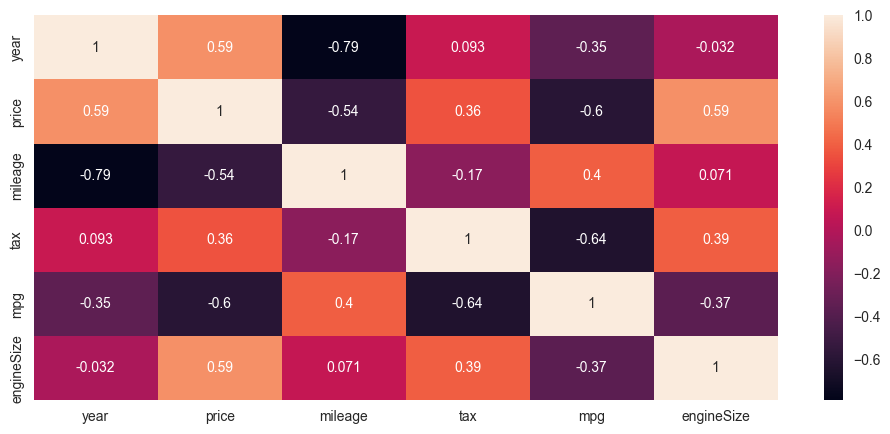

In [14]:
fig = plt.figure(figsize=(12,5))
sns.heatmap(temp_data.corr(), annot=True)

In [15]:
dummies_data = pd.get_dummies(temp_data)
dummies_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [16]:
X = dummies_data.drop('price', axis=1)
y = dummies_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (8534, 37)
Test shape: (2134, 37)


# Моделирование

In [18]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict) * 100))
    print()
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict) * 100))

In [19]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.893
Train MAE: 2550.204
Train MAPE: 13.383

Train R^2: 0.887
Train MAE: 2613.726
Train MAPE: 12.876


In [20]:
scalar = preprocessing.MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

sqd_lr = linear_model.SGDRegressor(random_state=42)
sqd_lr.fit(X_train_scaled, y_train)
y_train_pred = sqd_lr.predict(X_train_scaled)
y_test_pred = sqd_lr.predict(X_test_scaled)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.888
Train MAE: 2566.030
Train MAPE: 13.819

Train R^2: 0.884
Train MAE: 2601.702
Train MAPE: 12.876


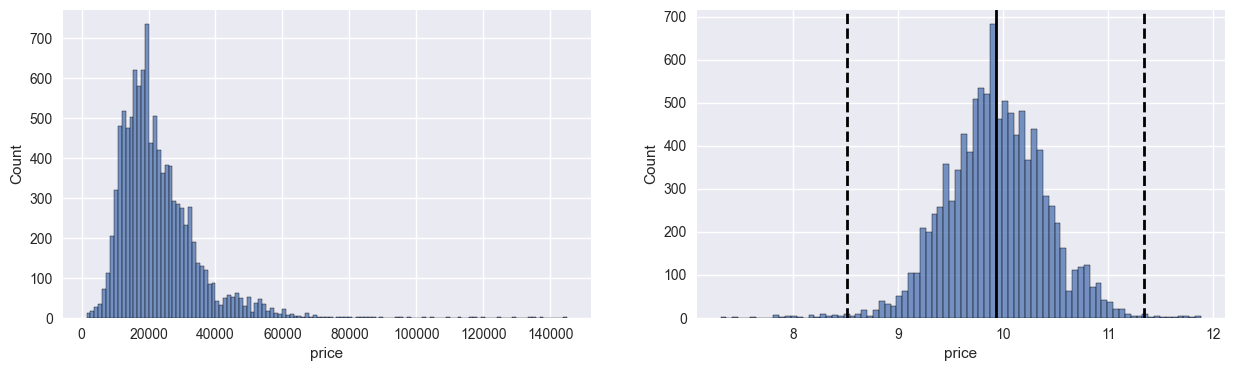

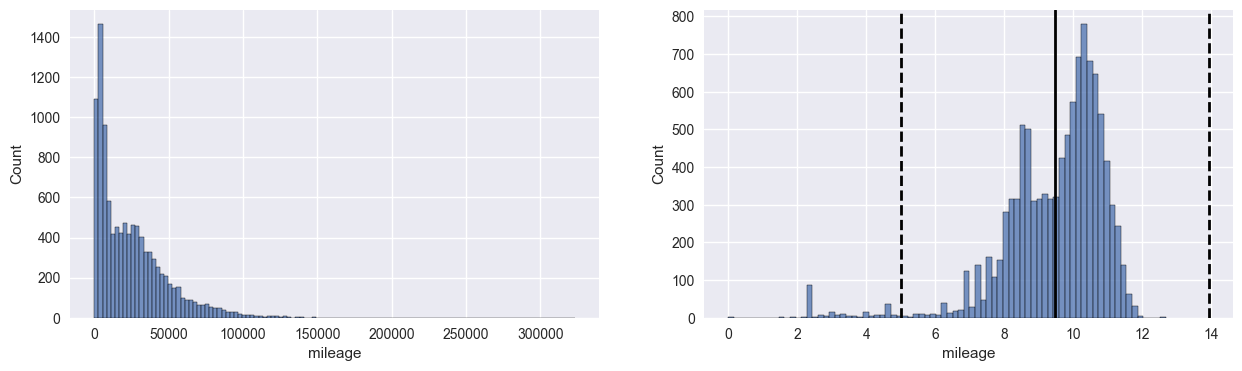

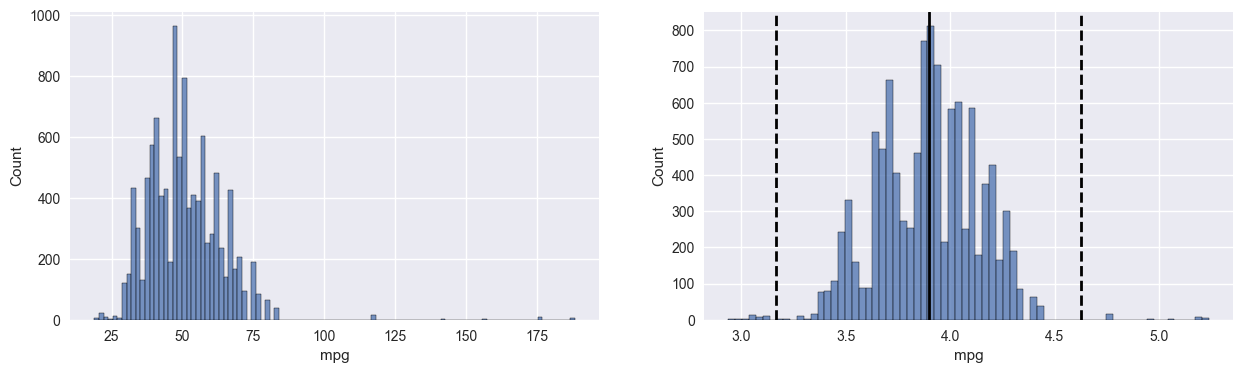

In [23]:
for x in ['price', 'mileage', 'mpg']:
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    sns.histplot(data=temp_data, x=x, ax=axes[0])
    log_price = np.log(temp_data[x])
    sns.histplot(data=log_price, ax=axes[1])
    axes[1].axvline(log_price.mean(), color='k', lw=2)
    axes[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
    axes[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2)

In [24]:
def outliers_z_score(data, feature, log_scale=False):
    x = np.log(data[feature] + 1) if log_scale else data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, temp_cleaned = outliers_z_score(temp_data, 'price', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'mileage', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'mpg', log_scale=True)
print('Shape before cleaning outliers: {}'.format(temp_data.shape))
print('Shape after cleaning outliers: {}'.format(temp_cleaned.shape))

Shape before cleaning outliers: (10668, 9)
Shape after cleaning outliers: (10308, 9)
